<a href="https://colab.research.google.com/github/Svar7769/DeepLearnig/blob/main/digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%tensorflow_version 2.x
import tensorflow as tf

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random 
from tqdm import tqdm

#now shift to gpu
tf.config.list_physical_devices('GPU')

[]

In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

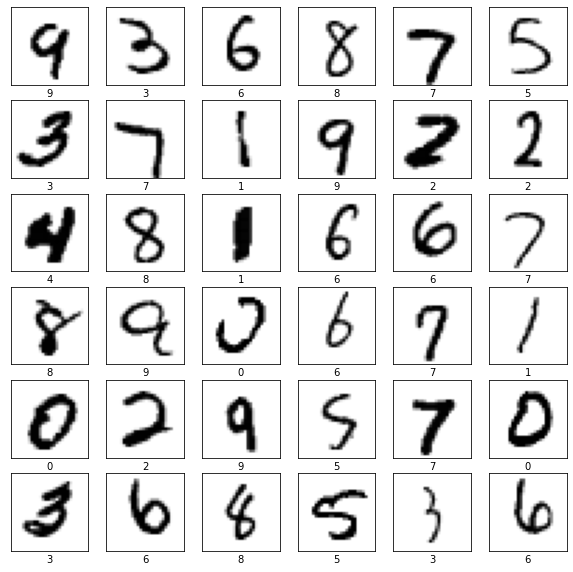

In [5]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
  plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  image_ind = random_inds[i]
  plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(train_labels[image_ind])

In [6]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                ])
  return fc_model

model = build_fc_model()

In [7]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
BATCH_SIZE = 64
EPOCHS = 100
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)


Epoch 1/100
938/938 [==============================] - 2s 2ms/step - loss: 0.9267 - accuracy: 0.7700
Epoch 2/100
938/938 [==============================] - 2s 2ms/step - loss: 0.4221 - accuracy: 0.8869
Epoch 3/100
938/938 [==============================] - 2s 2ms/step - loss: 0.3518 - accuracy: 0.9025
Epoch 4/100
938/938 [==============================] - 2s 2ms/step - loss: 0.3173 - accuracy: 0.9103
Epoch 5/100
938/938 [==============================] - 2s 2ms/step - loss: 0.2941 - accuracy: 0.9168
Epoch 6/100
938/938 [==============================] - 2s 2ms/step - loss: 0.2763 - accuracy: 0.9223
Epoch 7/100
938/938 [==============================] - 2s 2ms/step - loss: 0.2618 - accuracy: 0.9257
Epoch 8/100
938/938 [==============================] - 2s 2ms/step - loss: 0.2491 - accuracy: 0.9295
Epoch 9/100
938/938 [==============================] - 2s 2ms/step - loss: 0.2381 - accuracy: 0.9335
Epoch 10/100
938/938 [==============================] - 2s 2ms/step - loss: 0.2280 - accura

313/313 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.9750
[[1.1074289e-09 1.6373836e-08 2.3657617e-07 1.2927683e-02 3.9656885e-13
  9.8707098e-01 7.6540371e-11 9.2155898e-07 1.7137478e-09 6.2274587e-08]]
[[9.9991488e-01 5.4365148e-07 8.3199819e-05 2.9928407e-07 1.6647549e-09
  1.7502677e-07 4.0192035e-07 5.0325234e-08 4.5997450e-09 4.7277962e-07]]
[[5.8086884e-05 1.9196232e-04 1.8180340e-03 4.7521034e-04 9.8887748e-01
  8.5928550e-06 9.8303915e-04 4.2301305e-03 2.3887682e-04 3.1185122e-03]]
[[2.6987952e-06 9.9884218e-01 2.0635058e-04 8.2507486e-06 5.6998510e-05
  1.5607629e-05 7.2076336e-06 5.1909889e-04 3.3967820e-04 1.9487231e-06]]
Test accuracy:  0.9750000238418579


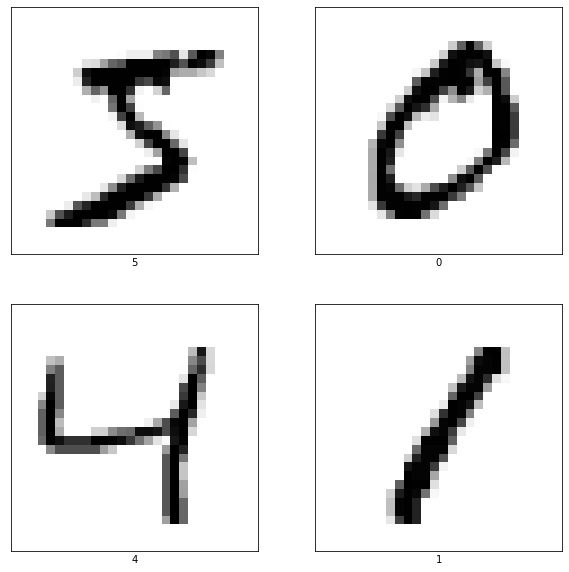

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
plt.figure(figsize=(10,10))

#output and image
for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.xticks([])
  plt.yticks([])
  image_ind = i
  plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(train_labels[image_ind])
  print(model.predict(train_images[[i]]))
print("Test accuracy: ", test_acc)

9
3
8
9


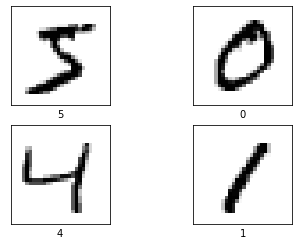

In [71]:
#output will be random
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
cnn_model.predict(train_images[[0]])

for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.xticks([])
  plt.yticks([])
  image_ind = i
  plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(train_labels[image_ind])
  print(np.argmax(cnn_model.predict(train_images[[i]])))



In [73]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [76]:
#training the CNN model

cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=3)

Epoch 1/3
938/938 [==============================] - 33s 35ms/step - loss: 0.0342 - accuracy: 0.9897
Epoch 2/3
938/938 [==============================] - 33s 35ms/step - loss: 0.0260 - accuracy: 0.9918
Epoch 3/3
938/938 [==============================] - 32s 34ms/step - loss: 0.0204 - accuracy: 0.9934


313/313 [==============================] - 2s 8ms/step - loss: 0.0386 - accuracy: 0.9887
Test Acc : 0.9886999726295471
7
2
4
9


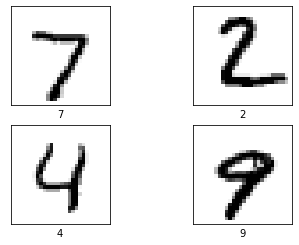

In [106]:

test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print("Test Acc :",test_acc)
#group View
for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.xticks([])
  plt.yticks([])
  image_ind = i*i
  plt.imshow(np.squeeze(test_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(test_labels[image_ind])
  print(np.argmax(cnn_model.predict(test_images[[i*i]])))

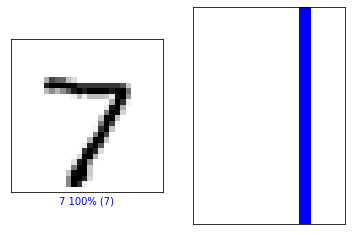

In [105]:
#Detail View
image_index = 0
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

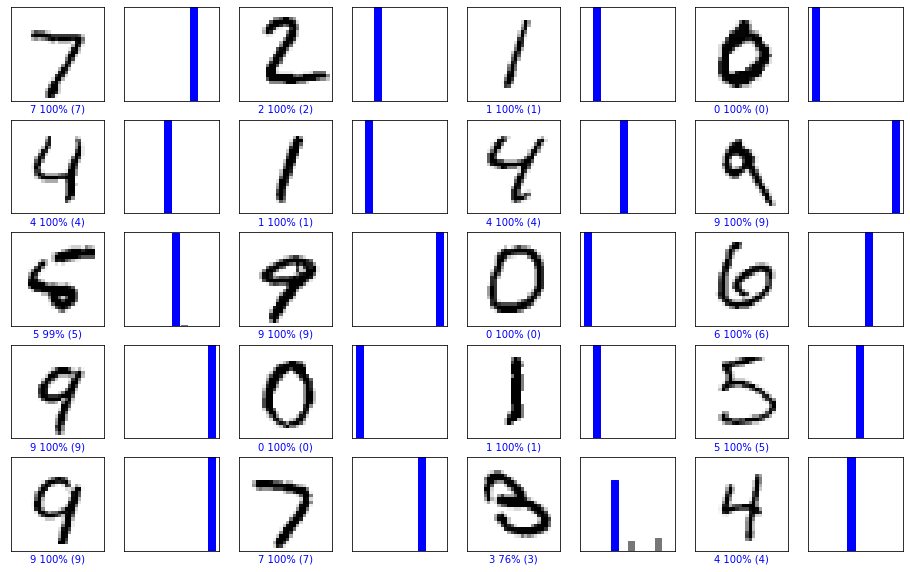

In [107]:
#detailed group View
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)

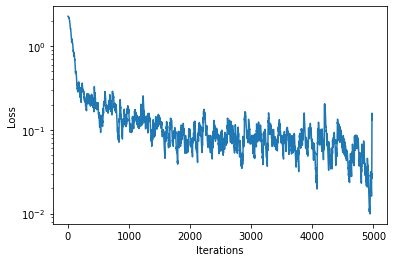

100%|██████████| 5000/5000 [01:39<00:00, 50.11it/s]


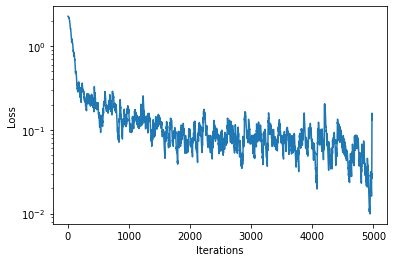

In [111]:
cnn_model = build_cnn_model()

batch_size = 12
loss_history = mdl.util.LossHistory(smoothing_factor=0.95)
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)

if hasattr(tqdm, '_instances'): tqdm._instances.clear()

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  with tf.GradientTape() as tape:
    logits = cnn_model(images)

    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)

  loss_history.append(loss_value.numpy().mean())
  plotter.plot(loss_history.get())

  grads = tape.gradient(loss_value, cnn_model.trainable_variables)

  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))

Test Acc : 0.9886999726295471
7
2
4
9


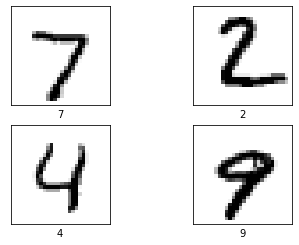

In [112]:
print("Test Acc :",test_acc)
#group View
for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.xticks([])
  plt.yticks([])
  image_ind = i*i
  plt.imshow(np.squeeze(test_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(test_labels[image_ind])
  print(np.argmax(cnn_model.predict(test_images[[i*i]])))